<a href="https://colab.research.google.com/github/DanielBojchovski/Iris_randomforest/blob/main/iris_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Install the anvil-uplink library.***

In [60]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


***Importing the Dependencies***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import anvil.server

anvil.server.connect("TV7JECPDNSFZE2NO4UYIGKNA-J6AODOM22CXQPK3W")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


***Data Collection and Data Processing***

In [2]:
datafile = pd.read_csv("/content/sample_data/iris.csv")
datafile.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
target_names = datafile.species.unique()
target_names

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [4]:
map_dict = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
datafile['species'].replace(map_dict, inplace=True)
target = datafile.iloc[:,4].values
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
feature_names = datafile.columns
feature_names

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [6]:
data = datafile.iloc[:,:-1].values
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
X = data
y = target

***Training and Test data***

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

***Model Training --> RandomForestClassifier***

Text(0, 0.5, 'Testing Accuracy')

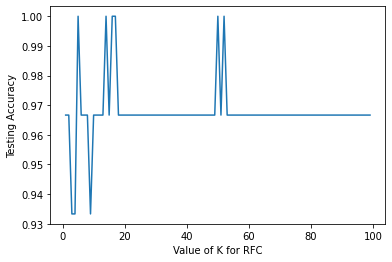

In [9]:
scores = {}
scores_list = []
k_range = range(1, 100)
for k in k_range:
  rfc = RandomForestClassifier(n_estimators=k)
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for RFC')
plt.ylabel('Testing Accuracy')

In [10]:
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [11]:
model.score(X_test, y_test) * 100 

96.66666666666667

In [12]:
y_predicted = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

Text(69.0, 0.5, 'Truth')

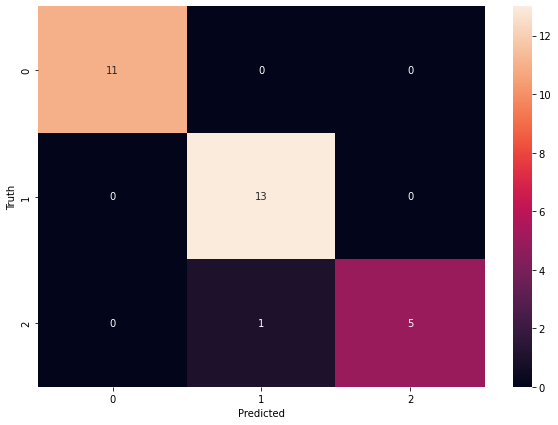

In [14]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth') 

***Making a Predictive System***

In [15]:
input_data = (2, 2, 2, 2)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The flower is Setosa")
elif (prediction[0] == 1):
  print("The flower is Versicolor")
elif (prediction[0] == 2):
  print("The flower is Virginica")

[0]
The flower is Setosa


***Creating Our predict_iris() Function***





In [16]:
@anvil.server.callable
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  classification = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
  print(target_names[classification][0])
  return target_names[classification][0]

In [ ]:
anvil.server.wait_forever()

Setosa
Virginica
Virginica
Virginica
Virginica
Versicolor
Virginica


To test the app click on the following [link https://iris-randomforest.anvil.app/](https://iris-randomforest.anvil.app/
)